### Test wtih JuMP

In [4]:
using JuMP , Ipopt
include("../Problems/JuMP/robot_JMP.jl")
RobotJMP = robot_JMP();

set_optimizer(RobotJMP,Ipopt.Optimizer)
set_attribute(RobotJMP, "print_level", 5)
set_optimizer_attribute(RobotJMP,"tol",1e-8)
set_optimizer_attribute(RobotJMP,"constr_viol_tol",1e-6)
set_optimizer_attribute(RobotJMP,"max_iter",1000)

In [5]:
println("Solving...")
optimize!(RobotJMP)
println()

# Display results
if termination_status(RobotJMP) == MOI.OPTIMAL
    println("  Solution is optimal")
elseif  termination_status(RobotJMP) == MOI.LOCALLY_SOLVED
    println("  (Local) solution found")
elseif termination_status(RobotJMP) == MOI.TIME_LIMIT && has_values(RobotJMP)
    println("  Solution is suboptimal due to a time limit, but a primal solution is available")
else
    error("  The model was not solved correctly.")
end
println("  objective value = ", objective_value(RobotJMP))
println()


# Retrieves values (including duals - sign convention according to Pontrjagin max principle)
N = 200
L = 5.0

rho_ = RobotJMP[:rho];
the_ = RobotJMP[:the];
phi_ = RobotJMP[:phi];

rho_dot_ = RobotJMP[:rho_dot];
the_dot_ = RobotJMP[:the_dot];
phi_dot_ = RobotJMP[:phi_dot];

u_rho_ = RobotJMP[:u_rho];
u_the_ = RobotJMP[:u_the];
u_phi_ = RobotJMP[:u_phi];

con_rho = RobotJMP[:con_rho];
con_the = RobotJMP[:con_the];
con_phi = RobotJMP[:con_phi];
con_rho_dot = RobotJMP[:con_rho_dot];
con_the_dot = RobotJMP[:con_the_dot];
con_phi_dot = RobotJMP[:con_phi_dot];

p = [ [ dual(con_rho[2]), dual(con_the[2]), dual(con_phi[2]), dual(con_rho_dot[2]), dual(con_the_dot[2]), dual(con_phi_dot[2]) ] ];
p = -[ p;[[ dual(con_rho[i]), dual(con_the[i]), dual(con_phi[i]), dual(con_rho_dot[i]), dual(con_the_dot[i]), dual(con_phi_dot[i]) ] for i in 2:N+1] ];

tf = value.(RobotJMP[:tf])
t = Vector((0:N)*tf/N);

rho = Vector(value.(rho_)) ;
the = Vector(value.(the_)) ;
phi = Vector(value.(phi_)) ;
phi_dot = Vector(value.(phi_dot_)) ;
the_dot = Vector(value.(the_dot_)) ;
rho_dot = Vector(value.(rho_dot_)) ;

u_phi = Vector(value.(u_phi_)) ;
u_the = Vector(value.(u_the_)) ;
u_rho = Vector(value.(u_rho_)) ;

u = [ [ u_rho[i], u_the[i], u_phi[i] ] for i in 1:N+1 ];
x =  [ [ rho[i],rho_dot[i],the[i],the_dot[i],phi[i],phi_dot[i] ] for i in 1:N+1 ];


Solving...

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:     8012
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    10200

Total number of variables............................:     1810
                     variables with only lower bounds:        1
                variables with lower and upper bounds:     1206
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1212
Total number of i

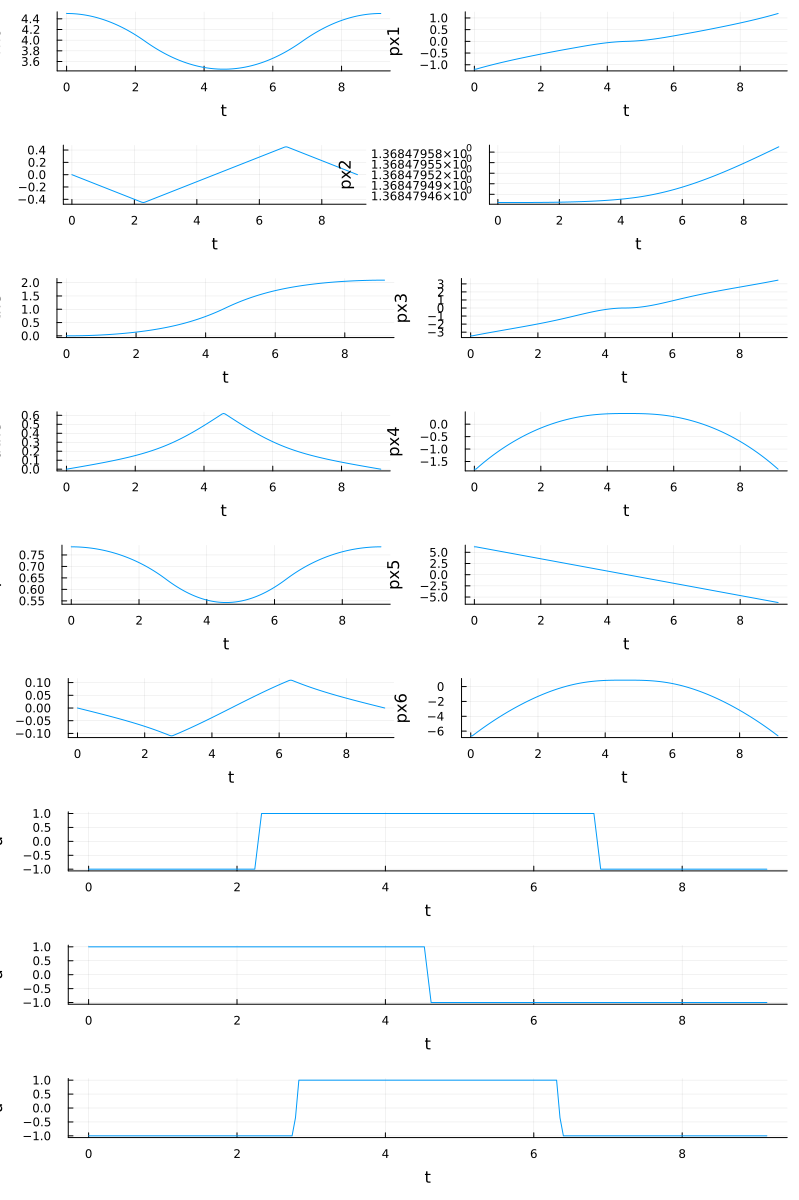

In [6]:
using Plots

x1_plot = plot(t, [ x[i][1] for i in 1:N+1 ], xlabel = "t", ylabel = "rho", legend = false)
x2_plot = plot(t, [ x[i][2] for i in 1:N+1 ], xlabel = "t", ylabel = "drho", legend = false)
x3_plot = plot(t, [ x[i][3] for i in 1:N+1 ], xlabel = "t", ylabel = "the", legend = false)
x4_plot = plot(t, [ x[i][4] for i in 1:N+1 ], xlabel = "t", ylabel = "dthe", legend = false)
x5_plot = plot(t, [ x[i][5] for i in 1:N+1 ], xlabel = "t", ylabel = "phi", legend = false)
x6_plot = plot(t, [ x[i][6] for i in 1:N+1 ], xlabel = "t", ylabel = "dphi", legend = false)
px1_plot = plot(t, [ p[i][1] for i in 1:N+1 ], xlabel = "t", ylabel = "px1", legend = false)
px2_plot = plot(t, [ p[i][2] for i in 1:N+1 ], xlabel = "t", ylabel = "px2", legend = false)
px3_plot = plot(t, [ p[i][3] for i in 1:N+1 ], xlabel = "t", ylabel = "px3", legend = false)
px4_plot = plot(t, [ p[i][4] for i in 1:N+1 ], xlabel = "t", ylabel = "px4", legend = false)
px5_plot = plot(t, [ p[i][5] for i in 1:N+1 ], xlabel = "t", ylabel = "px5", legend = false)
px6_plot = plot(t, [ p[i][6] for i in 1:N+1 ], xlabel = "t", ylabel = "px6", legend = false)

u1_plot = plot(t, [ u[i][1] for i in 1:N+1 ], xlabel = "t", ylabel = "u", legend = false)
u2_plot = plot(t, [ u[i][2] for i in 1:N+1 ], xlabel = "t", ylabel = "u", legend = false)
u3_plot = plot(t, [ u[i][3] for i in 1:N+1 ], xlabel = "t", ylabel = "u", legend = false)

layout = @layout [a b; c d; e f; g h; i j; k l; m; o; p]
x_plot = plot(x1_plot, px1_plot, x2_plot, px2_plot, x3_plot, px3_plot, 
            x4_plot, px4_plot, x5_plot, px5_plot, x6_plot, px6_plot,
            u1_plot, u2_plot, u3_plot, layout = layout)
x_plot = plot!(size = (800, 1200))

display(x_plot)

### Test with OptimalControl

In [7]:
using OptimalControl
include("../Problems/OptimalControl/robot_OC.jl")
RobotOC = robot_OC()


The (autonomous) optimal control problem is of the form:

    minimize  J(x, u, tf) = g(x(0), x(tf), tf)

    subject to

        ẋ(t) = f(x(t), u(t), tf), t in [0, tf] a.e.,

        ηl ≤ η(x(t), tf) ≤ ηu, 
        ϕl ≤ ϕ(x(0), x(tf), tf) ≤ ϕu, 

    where x(t) ∈ R⁶, u(t) ∈ R³ and tf ∈ R.

Declarations (* required):



┌────────┬────────┬──────────┬──────────┬───────────┬────────────┬─────────────┐
│ times* │ state* │ control* │ variable │ dynamics* │ objective* │ constraints │
├────────┼────────┼──────────┼──────────┼───────────┼────────────┼─────────────┤
│     ✅ │     ✅ │       ✅ │       ✅ │        ✅ │         ✅ │          ✅ │
└────────┴────────┴──────────┴──────────┴───────────┴────────────┴─────────────┘


In [8]:
sol = OptimalControl.solve(RobotOC)

Method = (:direct, :adnlp, :ipopt)
This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:     3612
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1414

Total number of variables............................:      910
                     variables with only lower bounds:        1
                variables with lower and upper bounds:      303
                     variables with only upper bounds:        0
Total number of equality constraints.................:      612
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e-01 4.40e+00 0.00e+00   0.

CTBase.OptimalControlSolution

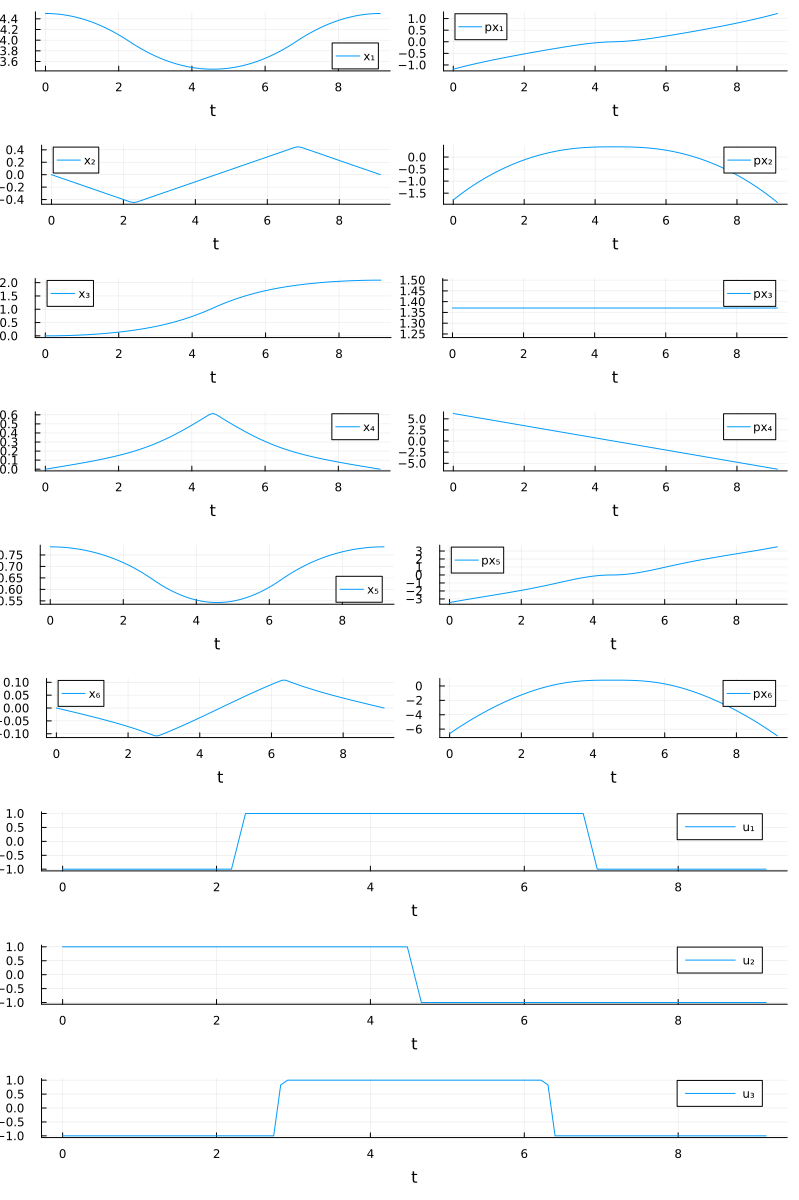

In [9]:
using Plots
p1 = plot(plot(sol)[1])

p2 = plot(plot(sol)[2])

p3 = plot(plot(sol)[3])

p4 = plot(plot(sol)[4])

p5 = plot(plot(sol)[5])

p6 = plot(plot(sol)[6])

p7 = plot(plot(sol)[7])

p8 = plot(plot(sol)[8])

p9 = plot(plot(sol)[9])

p10 = plot(plot(sol)[10])

p11 = plot(plot(sol)[11])

p12 = plot(plot(sol)[12])

p13 = plot(plot(sol)[13])

p14 = plot(plot(sol)[14])

p15 = plot(plot(sol)[15])

layout = @layout [a b; c d; e f; g h; i j; k l; m; o; p]

x_plot = plot(p1, p7, p2, p8, p3, p9, p4, p10, p5, p11, p6, p12, p13, p14, p15, layout = layout)
x_plot = plot!(size = (800, 1200))

display(x_plot)

### Plot results

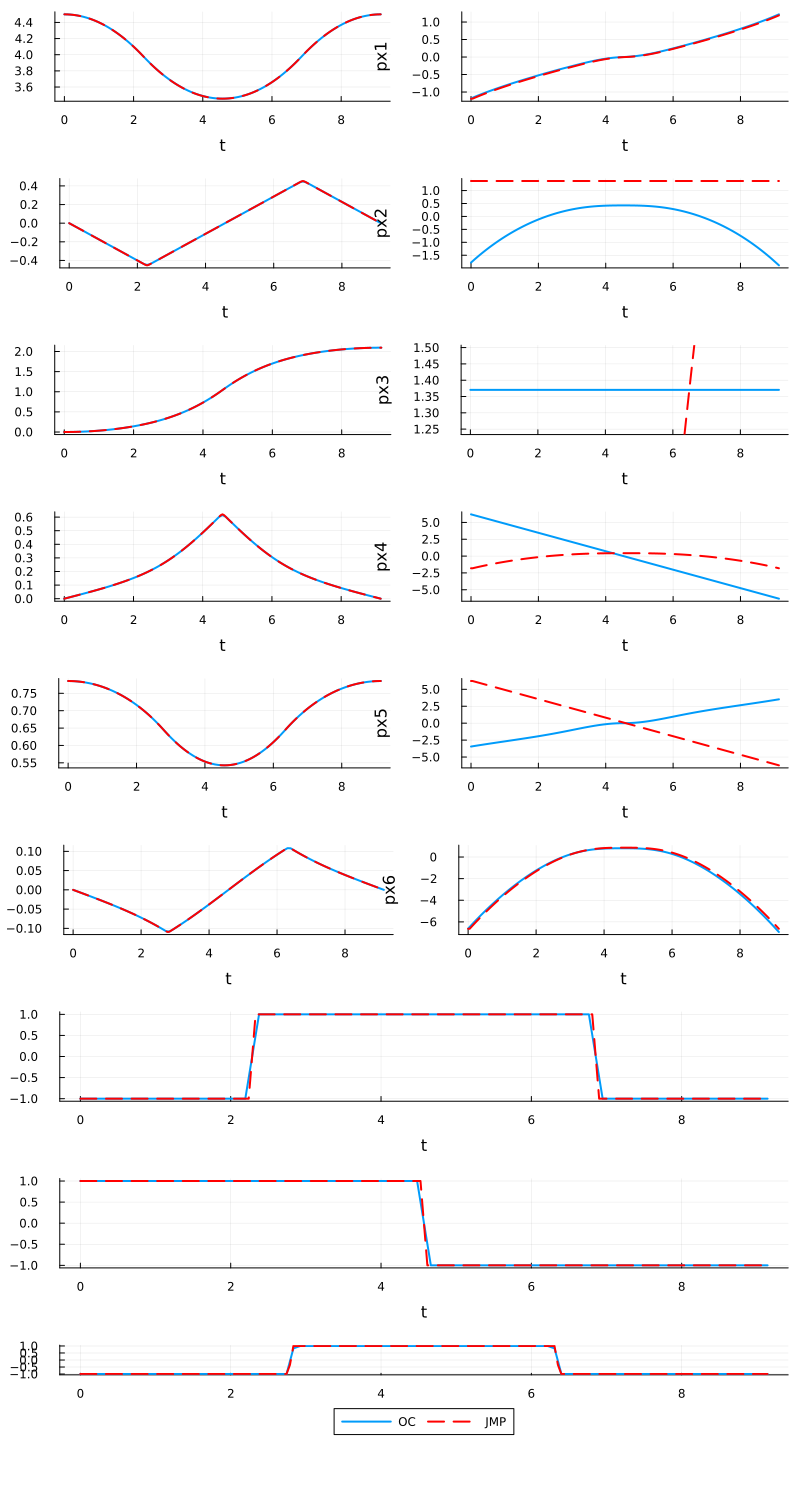

In [10]:
p1 = plot(plot(sol)[1],line = 2)
p1 = plot!(t, [ x[i][1] for i in 1:N+1 ], xlabel = "t", ylabel = "rho", legend = false,line = 2, color = "red",linestyle=:dash)

p2 = plot(plot(sol)[7],line = 2)
p2 = plot!(t, [ p[i][1] for i in 1:N+1 ], xlabel = "t", ylabel = "px1", legend = false,line = 2, color = "red",linestyle=:dash)

p3 = plot(plot(sol)[2],line = 2)
p3 = plot!(t, [ x[i][2] for i in 1:N+1 ], xlabel = "t", ylabel = "rho_dot", legend = false,line = 2, color = "red",linestyle=:dash)

p4 = plot(plot(sol)[8],line = 2)
p4 = plot!(t, [ p[i][2] for i in 1:N+1 ], xlabel = "t", ylabel = "px2", legend = false,line = 2, color = "red",linestyle=:dash)

p5 = plot(plot(sol)[3],line = 2)
p5 = plot!(t, [ x[i][3] for i in 1:N+1 ], xlabel = "t", ylabel = "the", legend = false,line = 2, color = "red",linestyle=:dash)

p6 = plot(plot(sol)[9],line = 2)
p6 = plot!(t, [ p[i][3] for i in 1:N+1 ], xlabel = "t", ylabel = "px3", legend = false,line = 2, color = "red",linestyle=:dash)

p7 = plot(plot(sol)[4],line = 2)
p7 = plot!(t, [x[i][4] for i in 1:N+1], xlabel = "t", ylabel = "the_dot", legend = false,line = 2, color = "red",linestyle=:dash)

p8 = plot(plot(sol)[10],line = 2)
p8 = plot!(t, [p[i][4] for i in 1:N+1], xlabel = "t", ylabel = "px4", legend = false,line = 2, color = "red",linestyle=:dash)

p9 = plot(plot(sol)[5],line = 2)
p9 = plot!(t, [x[i][5] for i in 1:N+1], xlabel = "t", ylabel = "phi", legend = false,line = 2, color = "red",linestyle=:dash)

p10 = plot(plot(sol)[11],line = 2)
p10 = plot!(t, [p[i][5] for i in 1:N+1], xlabel = "t", ylabel = "px5", legend = false,line = 2, color = "red",linestyle=:dash)

p11 = plot(plot(sol)[6],line = 2)
p11 = plot!(t, [x[i][6] for i in 1:N+1], xlabel = "t", ylabel = "phi_dot", legend = false,line = 2, color = "red",linestyle=:dash)

p12 = plot(plot(sol)[12],line = 2)
p12 = plot!(t, [p[i][6] for i in 1:N+1], xlabel = "t", ylabel = "px6", legend = false,line = 2, color = "red",linestyle=:dash)

p13 = plot(plot(sol)[13],line = 2)
p13 = plot!(t, [ u[i][1] for i in 1:N+1 ], xlabel = "t", ylabel = "u1", legend = false,line = 2, color = "red",linestyle=:dash)

p14 = plot(plot(sol)[14],line = 2)
p14 = plot!(t, [ u[i][2] for i in 1:N+1 ], xlabel = "t", ylabel = "u2", legend = false,line = 2, color = "red",linestyle=:dash)

p15 = plot(plot(sol)[15],label ="OC",line = 2)
p15 = plot!(t, [ u[i][3] for i in 1:N+1 ], xlabel = "t", ylabel = "u3", legend = false , label = "JMP",line = 2, color = "red",linestyle=:dash)
p15 = plot!(legend=:outerbottom, legendcolumns=2)

layout = @layout [a b; c d; e f; g h; i j; k l; m; o; p]

x_plot = plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, layout = layout)
x_plot = plot!(size = (800, 1500))

display(x_plot)

## Issue

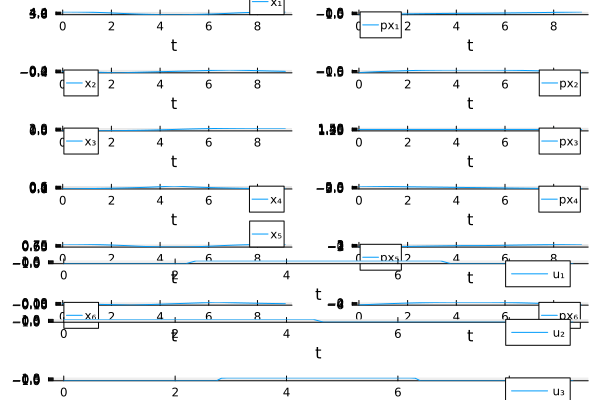

In [11]:
plot(sol)